# CNN 성능 향상 (overfitting 감소, accuracy 향상)

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/22-5.png" style="max-width: 60%; height: auto;"><p>

- <b>CIFAR 10 <p></b>

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/22-1.png" style="max-width: 60%; height: auto;">

---
### 1. 더 많은 레이어(Layer)쌓기
- 컨볼루션 레이어가 주첩된 더 깊은 구조가 될수록 성능은 크게 개선됨
- AlexNet(2021, 8 layers), VGGNet(2014, 19 layers), GoogleLeNet(2014, 22 layers), ResNet(2015, 152 layers) …

### 2. 이미지 데이터 보강 <b>(Image Data Augmentation)</b>
- 딥러닝에서는 많은 학습 데이터를 사용하면 성능을 개선 시킬 수 있음.
- 기존의 (이미지) 데이터가 있을 때, 해당 데이터를 원본으로 해서 다양한 변형 (rotate, shear, zoom, shift, horizontal flip …)을 주고, 이렇게 생성된 데이트를 원본 학습 데이트에 포함시켜 수많은 학습 데이터를 확보할 수 있음. 

### 3. 높은 해상도 (High Resolution) 학습 데이터 확보
- 동일한 CNN구조라면, 상대적으로 높은 해상도의 학습데이터를 종해 성능을 개선 시킬 수 있음. [CIFAR 10] 32X32 —> [ImageNet image] 469X 387

#### 4. L1 Norm $\cdot$ L2 Norm 등의 가중치 규제(regularization), Dropout, 배치 정규화 (Batch Normalization) 등을 통해 성능 개선.
---

# Image Data Augmentation
---
- 원본 이미지에 적절한 변형을 가해서 새로운 데이터를 만들어 내는 방식
- 즉 원본 이미지를 상하좌우 방향으로 조금 이동하거나, 약간 회전 또는 기울이거나 또는 확대 등의 여러가지 변화을 조합해 이미지 데이터 개수를 증가시킴.

### Image Data Augmentation 장점
- 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어 주기때문에 더 높음 성능을 기대할 수 있음.
- CNN 모델을 학습 시키기에 수집된 데이터가 적은 경우 강력한 힘을 발휘함.
---
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/22-2.png" style="max-width: 60%; height: auto;"> <p>

# ImageDataGenerator

- <b>ImageDataGenerator 주요 인수들은 rotation_range, width_shift_range, height_shift_range, rescale, shear_range, horizontal_flip </b>등이 있음  
- 이러한 ImageDataGenerator를 사용할 경우 <b>flow(), flow_from_directory()</b> 등의 함수를 통해 이미지 데이터를 보강 할 수 있음.

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/22-3.png" style="max-width: 60%; height: auto;"> <p>


<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/22-4.png" style="max-width: 60%; height: auto;"> <p>


# Tensorflow version 2.12.0 사용

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     

tf.__version__

'2.12.0'

## 1. ImageDataGenerator 생성 
---
- ImageDataGenerator() 함수를 사용하여 원본이미지에 대해
  > - rotation_range=30 : 30도 이내에서 회전
  > - width_shift_range=0.3 : 가로 방향 30$ 범위에서 이동
  > - shear_range=0.4 : 이미지 기울임은 40% 범위에서
  > - horizontal_flip=True : 좌우반전 가능
- "gen" object(객체) 생성
---

In [3]:
gen = ImageDataGenerator(rotation_range = 30,
                         width_shift_range=0.3,
                         shear_range=0.4,
                         horizontal_flip=True)

## 2. 이미지 로드 및 정규화 
---
- load_img() : JpegImageFile 로 return 하기 때문에,
- img_to_array() : numpy를 이용하여 array 로 바꿔줘야함.
- <b>img_array_list.append(loaded_img_array)</b> : img_array_list 에 list data type으로 append 됨.
- <b>np.array(img_array_list)</b> : 4차원 tensor로 변환.
- [cat & dog image 다운로드](http://cmseng.skku.edu/CMSLecture/ML/img/cat-dog.zip)
---

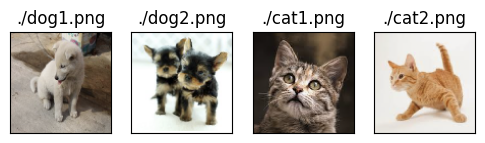

In [18]:
img_array_list = []
img_names = [ './dog1.png', './dog2.png', './cat1.png', './cat2.png' ]

for i in range(len(img_names)):

    loaded_img = load_img(img_names[i], target_size=(100,100)) 
    
    loaded_img_array = img_to_array(loaded_img) / 255.0

    img_array_list.append(loaded_img_array)


plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):

    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    # plt.axis('off')  
    plt.imshow(img_array_list[i])
# plt.show()

In [24]:
print(np.array(img_array_list).shape)

(4, 100, 100, 3)


## 3. flow() 함수 적용
---
- <b>flow()</b> 함수에 입력으로 주어지는 <b>원본 데이터 형상(shape) = (원본 데이터 전체 개수, 높이, 너비, 채널) 형태를 가지는 4차원 tensro</b> 로 주어져야 함.
- (100, 100, 3) 형태를 가지는 원본 데이터가 4개 있다면 flow() 함수를 사용하기 위해서는 다음과 같이 3차원 tensor를 원본 데이터의 총 개수가 포함된 4차원 tensor로 변화 해야함.
> - $(100, 100, 3) \Longrightarrow (4, 100, 100, 3)$
> - <b>np.array(img_array_list)</b> : 4차원 tensor로 변환.
- <b>"gen" object 에 flow() 함수 적용하여 "data_gen" 객체 생성</b>
---

In [37]:
batch_siz = 2

data_gen = gen.flow(np.array(img_array_list), batch_size=batch_siz)
print(type(gen))
print(type(data_gen))

<class 'keras.preprocessing.image.ImageDataGenerator'>
<class 'keras.preprocessing.image.NumpyArrayIterator'>


## 4. next() 함수 실행 및 변형 이미지 출력
---
- <b>"data_gen"에 next() 함수 적용하여 이미지 변형 $\rightarrow$  "img" numpy array에 저장 </b>
- batch_size=2 지정된 개수만큼 랜덤하게 선택된 이미지를 생성.
---

<class 'numpy.ndarray'>


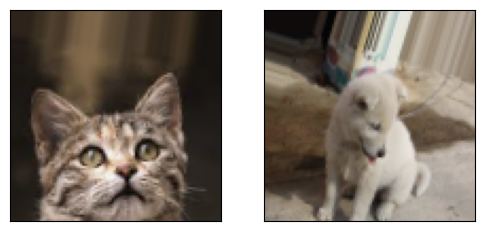

In [54]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

# plt.show()
print(type(img))

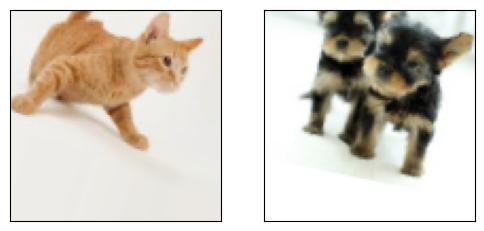

In [55]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

## 5. flow_from_directory() 함수 
---
- ImageDataGenerator() 함수를 사용하여 원본이미지에 대해
  > - rotation_range=30 : 30도 이내에서 회전
  > - width_shift_range=0.3 : 가로 방향 30$ 범위에서 이동
  > - shear_range=0.4 : 이미지 기울임은 40% 범위에서
  > - rescale=1./255 : 정규화
- "gen" object(객체) 생성
--- 

In [56]:
gen = ImageDataGenerator(rotation_range = 30,
                         width_shift_range = 0.3,
                         shear_range=0.3,
                         rescale=1./255)

---
- flow_from_directory() 함수는 이미지를 불러 올때, 주어진 디렉토리의 <b>하위 디렉토리 이름에 맞춰 자동으로 labeling</b>해줌
- [test_dir.zip 다운로드](http://cmseng.skku.edu/CMSLecture/ML/img/test_dir.zip)
<pre>
    test_dir
      |
      |- cat: cat1.png / cat2.png
      |- deer: deer1.png / deer2.png
      |- dog: dog1.png / dog2.png
</pre>
- 또한, <b>class_mode는 정답을 나타내는 방식을 나타내며 다흠과 같이 지정할 수 있음.</b>
> - 'binary' $\rightarrow$ 정답은 0 또는 1
> - 'categorical' $\rightarrow$ 정답은 one-hot encoding 형태
> - 'sparse' $\rightarrow$ 정답은 십진수 형태

---

In [70]:
data_path = './test_dir/'
batch_siz = 3

data_gen = gen.flow_from_directory(directory=data_path,
                                   batch_size=batch_siz,
                                   shuffle=True,
                                   target_size=(100, 100),
                                   class_mode='categorical')     # next() 에서 plt.title(str(np.argmax(label[i]))) 사용 
                                   # class_mode='sparse')        # next() 에서 plt.title(str(int(label[i]))) 사용 

Found 6 images belonging to 3 classes.


---
- mode='categorical' 방식으로 설정했기 때문에 next() 실행으로 리턴되는 정답(label)은 one-hot encoding 방식으로 나타남.
- 따라서, 정답을 십진수로 표시하기 위해 <code>np.argmax()</code> 사용
- batch_size=3 지정된 개수만큼 랜덤하게 선택된 이미지를 생성.

---

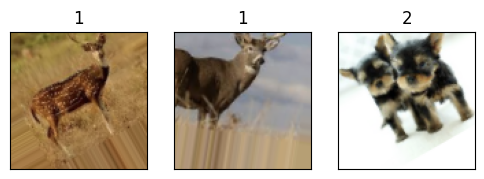

In [71]:
img, label = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):

    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    # plt.title(str(int(label[i])))

    plt.imshow(img[i])